In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from requests import exceptions
import argparse
import requests
import cv2
import os
import shutil

def downloadData(query,output):
	"""
	# construct the argument parser and parse the arguments
	ap = argparse.ArgumentParser()
	ap.add_argument("-q", "--query", required=True,
		help="search query to search Bing Image API for")
	ap.add_argument("-o", "--output", required=True,
		help="path to output directory of images")
	args = vars(ap.parse_args())
    """
	if not os.path.exists(output):
		os.makedirs(output)
	#if os.path.exists(output):
		#shutil.rmtree(output)

	# set your Microsoft Cognitive Services API key along with (1) the
	# maximum number of results for a given search and (2) the group size
	# for results (maximum of 50 per request)
	API_KEY = "fc977757f312454ba48e27c94b5213aa"
	MAX_RESULTS = 200
	GROUP_SIZE = 50

	# set the endpoint API URL
	URL = "https://api.cognitive.microsoft.com/bing/v7.0/images/search"

	# when attemping to download images from the web both the Python
	# programming language and the requests library have a number of
	# exceptions that can be thrown so let's build a list of them now
	# so we can filter on them
	EXCEPTIONS = set([IOError, FileNotFoundError,
		exceptions.RequestException, exceptions.HTTPError,
		exceptions.ConnectionError, exceptions.Timeout])

	# store the search term in a convenience variable then set the
	# headers and search parameters
	#term = args["query"]
	term = query
	headers = {"Ocp-Apim-Subscription-Key" : API_KEY}
	params = {"q": term, "offset": 0, "count": GROUP_SIZE}

	# make the search
	print("[INFO] searching Bing API for '{}'".format(term))
	search = requests.get(URL, headers=headers, params=params)
	search.raise_for_status()

	# grab the results from the search, including the total number of
	# estimated results returned by the Bing API
	results = search.json()
	estNumResults = min(results["totalEstimatedMatches"], MAX_RESULTS)
	print("[INFO] {} total results for '{}'".format(estNumResults,
		term))

	# initialize the total number of images downloaded thus far
	total = 0

	# loop over the estimated number of results in `GROUP_SIZE` groups
	for offset in range(0, estNumResults, GROUP_SIZE):
		# update the search parameters using the current offset, then
		# make the request to fetch the results
		print("[INFO] making request for group {}-{} of {}...".format(
			offset, offset + GROUP_SIZE, estNumResults))
		params["offset"] = offset
		search = requests.get(URL, headers=headers, params=params)
		search.raise_for_status()
		results = search.json()
		print("[INFO] saving images for group {}-{} of {}...".format(
			offset, offset + GROUP_SIZE, estNumResults))

		# loop over the results
		for v in results["value"]:
			# try to download the image
			try:
				# make a request to download the image
				print("[INFO] fetching: {}".format(v["contentUrl"]))
				r = requests.get(v["contentUrl"], timeout=30)

				# build the path to the output image
				ext = v["contentUrl"][v["contentUrl"].rfind("."):]
				#print("File Extension is "+ str(ext))
				#p = os.path.sep.join([args["output"], "{}{}".format(
					#str(total).zfill(8), ext)])
				p = os.path.sep.join([output, "{}{}".format(
					str(total).zfill(8), ".jpg")])

				# write the image to disk
				f = open(p, "wb")
				f.write(r.content)
				f.close()

			# catch any errors that would not unable us to download the
			# image
			except Exception as e:
				# check to see if our exception is in our list of
				# exceptions to check for
				if type(e) in EXCEPTIONS:
					print("[INFO] skipping: {}".format(v["contentUrl"]))
					continue

			# try to load the image from disk
			image = cv2.imread(p)

			# if the image is `None` then we could not properly load the
			# image from disk (so it should be ignored)
			try:
			  if image is None:
				  print("[INFO] deleting: {}".format(p))
				  os.remove(p)
				  continue
			except:
			  continue

			# update the counter
			total += 1

downloadData("charmander","dataset/charmander")
downloadData("pikachu","dataset/pikachu")
downloadData("squirtle","dataset/squirtle")
downloadData("bulbasaur","dataset/bulbasaur")
downloadData("mewtwo","dataset/mewtwo")

[INFO] searching Bing API for 'charmander'
[INFO] 200 total results for 'charmander'
[INFO] making request for group 0-50 of 200...
[INFO] saving images for group 0-50 of 200...
[INFO] fetching: https://www.wikihow.com/images/4/4c/Draw-Charmander-Step-22.jpg
[INFO] fetching: http://fc09.deviantart.net/fs70/i/2013/082/7/5/004_charmander_by_pklucario-d5z1g9v.png
[INFO] fetching: https://upload.wikimedia.org/wikipedia/sh/5/56/Charmander.png
[INFO] fetching: https://cms-images.idgesg.net/images/article/2016/08/charmander-100674865-large.png
[INFO] fetching: https://imonlybeingme.files.wordpress.com/2013/09/charmander.png
[INFO] fetching: http://img4.wikia.nocookie.net/__cb20140603214902/pokemon/images/9/96/004Charmander_OS_anime.png
[INFO] fetching: http://appian.com/assets/sites/2/2016/07/Charmander.png
[INFO] fetching: http://fc05.deviantart.net/fs70/f/2011/120/8/6/pokemon___charmander_by_lilnutta10-d2vr4ov.jpg
[INFO] fetching: http://2.bp.blogspot.com/-lt6m83kiRIU/UfY0bWaPf0I/AAAAAAAAD8

In [0]:
#import tarfile
#my_tar = tarfile.open('drive/My Drive/DL_Assignment_2/face.test.tar.gz')
#my_tar.extractall('./') # specify which folder to extract to
#my_tar = tarfile.open('drive/My Drive/DL_Assignment_2/face.train.tar.gz')
#my_tar.extractall('./') # specify which folder to extract to
#my_tar.close()

In [4]:
def load_dataset(data_path):
    #data_path = 'data/train/'
    
    train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transforms.Compose([transforms.Resize(size=(128,128)),
                                      transforms.ToTensor(),
                                      #transforms.ToPILImage(),
                                      transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5)),]),
                                      )
    return train_dataset
import math
#load_dataset("./dataset")   
split_train = math.floor(int(len(load_dataset("./dataset")))*0.8)
split_test = math.ceil(int(len(load_dataset("./dataset")))*0.2)
print("Training Samples:"+ str(split_train))
print("Testing Samples:"+ str(split_test))
train_set, val_set = torch.utils.data.random_split(load_dataset("./dataset"), [split_train,split_test])
train_loader = torch.utils.data.DataLoader(
        train_set,
        batch_size=1,
        num_workers=0,
        shuffle=False
        )
vald_loader = torch.utils.data.DataLoader(
       val_set,
        batch_size=1,
        num_workers=0,
        shuffle=False
        )


Training Samples:752
Testing Samples:189


In [0]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(49152, 32),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(256, 5)
        )
        
    def forward(self, x):
        # convert tensor (128, 1, 28, 28) --> (128, 1*28*28)
        x = x.view(x.size(0), -1)
        x = self.layers(x)
        return x

In [6]:
model = MLP()
print(model)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#print(device)
model.to(device)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=49152, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=32, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=128, out_features=256, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=256, out_features=5, bias=True)
  )
)


MLP(
  (layers): Sequential(
    (0): Linear(in_features=49152, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=32, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=128, out_features=256, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=256, out_features=5, bias=True)
  )
)

In [7]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

mean_train_losses = []
mean_valid_losses = []
valid_acc_list = []

epochs = 50

for epoch in range(epochs):
    model.train()
    
    train_losses = []
    valid_losses = []
    #for i, (images, labels) in enumerate(load_dataset("./dataset")):
    for i, (images, labels) in enumerate(train_loader):
        #print("Batch Loaded")
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())
      
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        #for i, (images, labels) in enumerate(load_dataset("./dataset")):
        for i, (images, labels) in enumerate(vald_loader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            
            valid_losses.append(loss.item())
            
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            
    mean_train_losses.append(np.mean(train_losses))
    mean_valid_losses.append(np.mean(valid_losses))
    
    accuracy = 100*correct/total
    valid_acc_list.append(accuracy)
    print('epoch : {}, train loss : {:.4f}, valid loss : {:.4f}, valid acc : {:.2f}%'\
         .format(epoch+1, np.mean(train_losses), np.mean(valid_losses), accuracy))
     

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch : 1, train loss : 1.9994, valid loss : 1.3864, valid acc : 43.92%
epoch : 2, train loss : 1.3047, valid loss : 1.3942, valid acc : 51.85%
epoch : 3, train loss : 1.2103, valid loss : 1.2914, valid acc : 58.73%
epoch : 4, train loss : 1.0276, valid loss : 0.8359, valid acc : 70.37%
epoch : 5, train loss : 1.0233, valid loss : 0.9021, valid acc : 78.31%
epoch : 6, train loss : 0.9238, valid loss : 2.7661, valid acc : 64.02%
epoch : 7, train loss : 0.9957, valid loss : 0.7715, valid acc : 74.07%
epoch : 8, train loss : 0.7763, valid loss : 0.7338, valid acc : 77.25%
epoch : 9, train loss : 0.8822, valid loss : 0.6939, valid acc : 78.31%
epoch : 10, train loss : 0.7421, valid loss : 0.8047, valid acc : 74.60%
epoch : 11, train loss : 0.7165, valid loss : 0.9490, valid acc : 74.60%
epoch : 12, train loss : 0.8759, valid loss : 0.7269, valid acc : 82.01%
epoch : 13, train loss : 0.6770, valid loss : 0.6119, valid acc : 79.37%
epoch : 14, train loss : 0.6941, valid loss : 0.9138, valid 

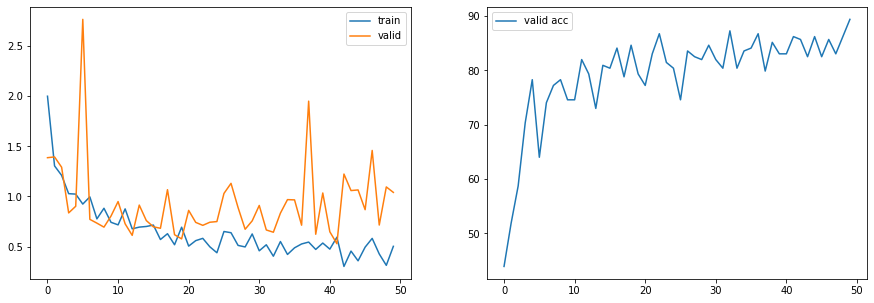

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1.plot(mean_train_losses, label='train')
ax1.plot(mean_valid_losses, label='valid')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='best')

ax2.plot(valid_acc_list, label='valid acc')
ax2.legend()

In [9]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
  for i, (images, labels) in enumerate(vald_loader):
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    loss = loss_fn(outputs, labels)
    valid_losses.append(loss.item())
            
    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == labels).sum().item()
    total += labels.size(0)
            
accuracy = 100*correct/total
print (accuracy)

89.41798941798942
